### libraries

In [3]:
import sqlite3
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime



from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing


sns.set()

#### import data

In [4]:
sample = pd.read_csv("sample_submission.csv")

test = pd.read_csv("test.csv")

df = pd.read_csv("train.csv")

#### Model 1
F1: 0.0
- datetime added as a float
- transforming non-numerical variables into numerical, so that they can be parsed into the model
- access_ID is index


In [5]:
df_model1 = df.copy()
df_model1.set_index('Access_ID', inplace = True)



In [6]:
# transform Date column into datetime type and then as float
df_model1.Date = pd.to_datetime(df_model1.Date).values.astype(float)

# transforming non-numerical variables into numerical, so that they can be parsed into the model
enc = LabelEncoder()
# turning OS
enc.fit(df_model1['OS'])
df_model1['OSn'] = enc.transform(df_model1['OS'])
# turning country
enc.fit(df_model1['Country'])
df_model1['CountryN'] = enc.transform(df_model1['Country'])
# turning type of visitor
enc.fit(df_model1['Type_of_Visitor'])
df_model1['Type_of_VisitorN'] = enc.transform(df_model1['Type_of_Visitor'])

# drop non numerical columns
df_model1 = df_model1.drop(['OS', 'Country', 'Type_of_Visitor'], axis=1)

df_model1.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy,OSn,CountryN,Type_of_VisitorN
Access_ID,,,,,,,,,,,,,,,,
102863333,1.584749e+18,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,2,1,0,3,5,2
103117814,1.589933e+18,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,2,6,0,6,1,2
103201891,1.607040e+18,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,4,1,0,6,3,2
103226087,1.608595e+18,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,2,2,1,6,8,2
103234445,1.606176e+18,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,2,3,1,6,6,2


In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_model1.drop('Buy', axis=1),df_model1['Buy'], test_size=0.2)

In [6]:
model1 = MLPClassifier().fit(X_train, y_train)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, model1.predict(X_test)))

[[1702    0]
 [ 298    0]]


In [8]:
# accuracy score
print("Model1 accuracy is %2.2f" % accuracy_score( 
     y_test, model1.predict(X_test)))

Model1 accuracy is 0.85


In [9]:
# classification report
from sklearn.metrics import classification_report
pred=model1.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1702
           1       0.00      0.00      0.00       298

    accuracy                           0.85      2000
   macro avg       0.43      0.50      0.46      2000
weighted avg       0.72      0.85      0.78      2000



/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

### Model 2
F1: 0.38 - 0.60

- Delete
- label-encoder non-numerical variables into numerical, so that they can be parsed into the model
- MinMax scaler



In [10]:
df_model2 = df.copy()
df_model2.set_index('Access_ID', inplace = True)



In [11]:
# transforming non-numerical variables into numerical, so that they can be parsed into the model
enc = LabelEncoder()
# turning OS
enc.fit(df_model2['OS'])
df_model2['OSn'] = enc.transform(df_model2['OS'])
# turning country
enc.fit(df_model2['Country'])
df_model2['CountryN'] = enc.transform(df_model2['Country'])
# turning type of visitor
enc.fit(df_model2['Type_of_Visitor'])
df_model2['Type_of_VisitorN'] = enc.transform(df_model2['Type_of_Visitor'])

# drop non numerical columns
df_model2 = df_model2.drop(['OS', 'Country', 'Type_of_Visitor','Date'], axis=1)

df_model2.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy,OSn,CountryN,Type_of_VisitorN
Access_ID,,,,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,2,1,0,3,5,2
103117814,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,2,6,0,6,1,2
103201891,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,4,1,0,6,3,2
103226087,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,2,2,1,6,8,2
103234445,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,2,3,1,6,6,2


In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_model2.drop('Buy', axis=1),df_model2['Buy'], test_size=0.2)

In [13]:
model2 = MLPClassifier().fit(X_train, y_train)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, model2.predict(X_test)))

[[1589   89]
 [ 145  177]]


In [15]:
# accuracy score
print("Model1 accuracy is %2.2f" % accuracy_score( 
     y_test, model2.predict(X_test)))

Model1 accuracy is 0.88


In [16]:
# classification report
from sklearn.metrics import classification_report
pred=model2.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1678
           1       0.67      0.55      0.60       322

    accuracy                           0.88      2000
   macro avg       0.79      0.75      0.77      2000
weighted avg       0.88      0.88      0.88      2000



### Model 3
F1: 0.36 - 0.61

dropped:
- Date & categorical variables OS, Country, Type_of_visitor,  Date

In [17]:
df_model3 = df.copy()
df_model3.set_index('Access_ID', inplace = True)



In [18]:

# drop non numerical columns
df_model3 = df_model3.drop(['OS', 'Country', 'Type_of_Visitor','Date'], axis=1)

df_model3.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
Access_ID,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,2,1,0
103117814,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,2,6,0
103201891,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,4,1,0
103226087,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,2,2,1
103234445,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,2,3,1


In [19]:
X_train, X_test, y_train, y_test = train_test_split(df_model3.drop('Buy', axis=1),df_model3['Buy'], test_size=0.2)

In [20]:
model3 = MLPClassifier().fit(X_train, y_train)

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, model3.predict(X_test)))

[[1633   45]
 [ 180  142]]


In [22]:
# accuracy score
print("Model1 accuracy is %2.2f" % accuracy_score( 
     y_test, model3.predict(X_test)))

Model1 accuracy is 0.89


In [23]:
# classification report
from sklearn.metrics import classification_report
pred=model3.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      1678
           1       0.76      0.44      0.56       322

    accuracy                           0.89      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.88      0.89      0.87      2000



### Model 4

F1_score 0.60 - 0.62
- Deleted variables = Date, Os, Country, Type_of_visitor
- MinMax_scaler with numerical variables


Notes:

Looks like deleting date, os, country, type_of_visitor made the model more robust
more consist F1 score


In [24]:
df_model4 = df.copy()

df_model4.set_index('Access_ID', inplace = True)


In [25]:

# drop non numerical columns
df_model4 = df_model4.drop(['OS', 'Country', 'Type_of_Visitor','Date'], axis=1)
features4 = list(df_model4.columns)
df_model4.head()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
Access_ID,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,2,1,0
103117814,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,2,6,0
103201891,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,4,1,0
103226087,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,2,2,1
103234445,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,2,3,1


In [26]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_model4)
#scaled_feat = scaler.fit_transform(df_scaled[features[1:]])



# See what the fit method is doing (notice the trailing underscore):
#print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

df_model4[features4] = scaled_feat

# Checking max and min of minmaxed variables
# df_minmax[metric_features].describe().round(2)



In [27]:
X_train, X_test, y_train, y_test = train_test_split(df_model4.drop('Buy', axis=1),df_model4['Buy'], test_size=0.2)

In [28]:
model4 = MLPClassifier().fit(X_train, y_train)

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, model4.predict(X_test)))

[[1601  100]
 [ 119  180]]


In [30]:
# accuracy score
print("Model1 accuracy is %2.2f" % accuracy_score( 
     y_test, model4.predict(X_test)))

Model1 accuracy is 0.89


In [31]:
# classification report
from sklearn.metrics import classification_report
pred=model4.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1701
         1.0       0.64      0.60      0.62       299

    accuracy                           0.89      2000
   macro avg       0.79      0.77      0.78      2000
weighted avg       0.89      0.89      0.89      2000



### Model 5 (including date)



F1_score 
- month 0.61 - 0.66
- Day of week 0.57 - 0.65
- Season 0.59 - 0.67
- Weekday 0.58 - 0.66

model details
- Deleted variables = Os, Country, Type_of_visitor
- MinMax_scaler with all variables



Notes:
Adding Date increased the performance and with month there was the most consistent higher F1 score

In [32]:
df_model5 = df.copy()

df_model5.set_index('Access_ID', inplace = True)


In [33]:

# drop non numerical columns
df_model5 = df_model5.drop(['OS', 'Country', 'Type_of_Visitor',], axis=1)
features5 = list(df_model5.columns)
df_model5.head()

,Date,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
Access_ID,,,,,,,,,,,,,
102863333,21-Mar-20,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,2,1,0
103117814,20-May-20,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,2,6,0
103201891,4-Dec-20,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,4,1,0
103226087,22-Dec-20,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,2,2,1
103234445,24-Nov-20,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,2,3,1


In [34]:
#transform Date to datetime
# df_model5['Date']=df_model5['Date'].astype('datetime64[s]')
#test_data = test_data.drop(['Date'], axis=1)


# enc = preprocessing.LabelEncoder()
# enc.fit(df_model5['Date'])

df_model5['Date'] = pd.to_datetime(df_model5['Date'])
df_model5['month'] = df_model5['Date'].dt.month
#df_model5['Day_of_Week'] = pd.to_datetime(df_model5['Date']).dt.dayofweek
#df_model5['Season']=df_model5['Date'].dt.month%12 // 3 + 1
#df_model5['Weekday'] = ((pd.to_datetime(df_model5['Date']).dt.dayofweek) // 5 == 1).astype(int)

df_model5 = df_model5.drop(['Date'], axis=1)

In [35]:
features5 = list(df_model5.columns)

In [36]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_model5)
#scaled_feat = scaler.fit_transform(df_scaled[features[1:]])



# See what the fit method is doing (notice the trailing underscore):
#print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

df_model5[features5] = scaled_feat

# Checking max and min of minmaxed variables
# df_minmax[metric_features].describe().round(2)



In [37]:
X_train, X_test, y_train, y_test = train_test_split(df_model5.drop('Buy', axis=1),df_model5['Buy'], test_size=0.2)

In [38]:
model5 = MLPClassifier().fit(X_train, y_train)

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, model5.predict(X_test)))

[[1619   64]
 [ 125  192]]


In [40]:
# accuracy score
print("Model1 accuracy is %2.2f" % accuracy_score( 
     y_test, model5.predict(X_test)))

Model1 accuracy is 0.91


In [41]:
# classification report
from sklearn.metrics import classification_report
pred=model5.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      1683
         1.0       0.75      0.61      0.67       317

    accuracy                           0.91      2000
   macro avg       0.84      0.78      0.81      2000
weighted avg       0.90      0.91      0.90      2000



### Model 7 (Check model on numerical features)
According to a combination of Spearman, RFE and Lasso the following features should be considered:

- AccountMng_Pages	         Discard
- AccountMng_Duration	     Discard
- FAQ_Pages	                 Discard
- FAQ_Duration	             Discard
- Product_Pages	             Keep?
- Product_Duration	         Keep?
- GoogleAnalytics_BounceRate Discard
- GoogleAnalytics_ExitRate	 Keep
- GoogleAnalytics_PageValue	 Keep


Model details:
- MinMax_scaler with all variables
- Month included


And we discard the following:
- Country	Discard
- Browser	Discard


#### without numerical features (AccountMng_Pages, AccountMng_Duration, FAQ_Pages, FAQ_Duration,GoogleAnalytics_BounceRate) 
F1_score 0.59 - 0.65
#### Also without Product_pages & Product_duration
F1_score 0.57 - 0.66
#### With all numerical features (scores come from model 6)
F1_score 0.58 - 0.67



### Conclusion
Potentially a better robustness, but no improvement.

In [42]:
df_model7 = df.copy()

df_model7.set_index('Access_ID', inplace = True)


In [43]:

# drop non categorical variables
df_model7 = df_model7.drop(['Country', 'Browser'], axis=1)
features7 = list(df_model7.columns)


In [44]:
#transform Date to datetime
# df_model5['Date']=df_model5['Date'].astype('datetime64[s]')
#test_data = test_data.drop(['Date'], axis=1)


# enc = preprocessing.LabelEncoder()
# enc.fit(df_model5['Date'])

df_model7['Date'] = pd.to_datetime(df_model7['Date'])
df_model7['month'] = df_model7['Date'].dt.month
#df_model5['Day_of_Week'] = pd.to_datetime(df_model5['Date']).dt.dayofweek
#df_model5['Season']=df_model5['Date'].dt.month%12 // 3 + 1
#df_model5['Weekday'] = ((pd.to_datetime(df_model5['Date']).dt.dayofweek) // 5 == 1).astype(int)

df_model7= df_model7.drop(['Date'], axis=1)

In [45]:
categorical_features = ['OS','Type_of_Traffic','Type_of_Visitor','month']

#categorical_features = ['OS','Type_of_Traffic','Type_of_Visitor','month','Country', 'Browser']

In [46]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_model7[categorical_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_model7.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
df_model7 = pd.concat([df_model7.drop(columns=categorical_features), ohc_df], axis=1)



/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [47]:
features7 = list(df_model7.columns)

In [48]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_model7)
#scaled_feat = scaler.fit_transform(df_scaled[features[1:]])



# See what the fit method is doing (notice the trailing underscore):
#print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

df_model7[features7] = scaled_feat

# Checking max and min of minmaxed variables
# df_minmax[metric_features].describe().round(2)



In [49]:
# df_model7.drop(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'GoogleAnalytics_BounceRate'], axis = 1, inplace = True)

df_model7.drop(['Product_Pages','Product_Duration','AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'GoogleAnalytics_BounceRate'], axis = 1, inplace = True)



In [50]:
X_train, X_test, y_train, y_test = train_test_split(df_model7.drop('Buy', axis=1),df_model7['Buy'], test_size=0.2)

In [51]:
model7 = MLPClassifier().fit(X_train, y_train)

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, model7.predict(X_test)))

[[1627   80]
 [ 132  161]]


In [53]:
# accuracy score
print("Model1 accuracy is %2.2f" % accuracy_score( 
     y_test, model7.predict(X_test)))

Model1 accuracy is 0.89


In [54]:
# classification report
from sklearn.metrics import classification_report
pred=model7.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94      1707
         1.0       0.67      0.55      0.60       293

    accuracy                           0.89      2000
   macro avg       0.80      0.75      0.77      2000
weighted avg       0.89      0.89      0.89      2000



### Model 6 (Check model on Categorical features)

according to Chi-square we should keep the following categorical features:
- Date
- OS
- Type of Visitor
- Type of Traffic

And we should discard the following:
- Country	Discard
- Browser	Discard



Model details:
- MinMax_scaler with all variables
- Month included


#### without categorical features (Country, Browser) 
F1_score 0.58 - 0.67
#### With all categorical features 
F1_score 0.54 - 0.60

### Conclusion
Without categorical features Country, Browser the model performs better

In [7]:
df_model6 = df.copy()

df_model6.set_index('Access_ID', inplace = True)


In [8]:

# drop non categorical variables
df_model6 = df_model6.drop(['Country', 'Browser'], axis=1)
features6 = list(df_model6.columns)


In [9]:
#transform Date to datetime
# df_model5['Date']=df_model5['Date'].astype('datetime64[s]')
#test_data = test_data.drop(['Date'], axis=1)


# enc = preprocessing.LabelEncoder()
# enc.fit(df_model5['Date'])

df_model6['Date'] = pd.to_datetime(df_model6['Date'])
df_model6['month'] = df_model6['Date'].dt.month
#df_model5['Day_of_Week'] = pd.to_datetime(df_model5['Date']).dt.dayofweek
#df_model5['Season']=df_model5['Date'].dt.month%12 // 3 + 1
#df_model5['Weekday'] = ((pd.to_datetime(df_model5['Date']).dt.dayofweek) // 5 == 1).astype(int)

df_model6 = df_model6.drop(['Date'], axis=1)

In [10]:
categorical_features = ['OS','Type_of_Traffic','Type_of_Visitor','month']

#categorical_features = ['OS','Type_of_Traffic','Type_of_Visitor','month','Country', 'Browser']

In [11]:
# Use OneHotEncoder to encode the categorical features. Get feature names and create a DataFrame 
# with the one-hot encoded categorical features (pass feature names)
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_model6[categorical_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_model6.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [12]:
df_model6 = pd.concat([df_model6.drop(columns=categorical_features), ohc_df], axis=1)
df_model6

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Buy,...,x2_Returner,x3_3,x3_5,x3_6,x3_7,x3_8,x3_9,x3_10,x3_11,x3_12
Access_ID,,,,,,,,,,,,,,,,,,,,,
102863333,0,0.0,0,0.0,3,64.0000,0.0000,0.0667,0.0000,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103117814,0,0.0,0,0.0,23,684.5000,0.0217,0.0449,0.0000,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103201891,0,0.0,0,0.0,8,95.0000,0.0250,0.0583,0.0000,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103226087,0,0.0,0,0.0,9,608.7500,0.0000,0.0250,42.4225,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
103234445,0,0.0,2,386.0,36,1609.9397,0.0000,0.0093,12.5033,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798279589,3,159.0,2,55.5,23,1100.1250,0.0000,0.0111,0.0000,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798314158,6,175.1,0,0.0,3,27.6000,0.0000,0.0111,0.0000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
798339820,0,0.0,0,0.0,27,644.0000,0.0077,0.0519,0.0000,0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
features6 = list(df_model6.columns)

In [14]:
# Use MinMaxScaler to scale the data
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_model6)
#scaled_feat = scaler.fit_transform(df_scaled[features[1:]])



# See what the fit method is doing (notice the trailing underscore):
#print("Parameters fitted:\n", scaler.data_min_, "\n", scaler.data_max_)

df_model6[features6] = scaled_feat

# Checking max and min of minmaxed variables
# df_minmax[metric_features].describe().round(2)



In [15]:
X = df_model6.drop('Buy', axis=1)
y = df_model6['Buy']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df_model6.drop('Buy', axis=1),df_model6['Buy'], test_size=0.2)

In [17]:
model6 = MLPClassifier().fit(X_train, y_train)

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(confusion_matrix(y_test, model6.predict(X_test)))

[[1627   70]
 [ 138  165]]


In [19]:
# accuracy score
print("Model1 accuracy is %2.2f" % accuracy_score( 
     y_test, model6.predict(X_test)))

Model1 accuracy is 0.90


In [20]:
# classification report
from sklearn.metrics import classification_report
pred=model6.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1697
         1.0       0.70      0.54      0.61       303

    accuracy                           0.90      2000
   macro avg       0.81      0.75      0.78      2000
weighted avg       0.89      0.90      0.89      2000



<div class="alert alert-block alert-info">
<a class="anchor" id="three-bullet">     

#  - parameters in Neural Networks
</a>    
</div>

In [42]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

X = df_model6.drop('Buy', axis=1)
y = df_model6['Buy']

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

<div class="alert alert-block alert-success">
<a class="anchor" id="four-bullet">    

### 1. - The hidden layer
 </a>
    
</div>

__The number of hidden layers__<br>
-	Increase the number of hidden layers might improve the accuracy or might not, it depend on the complexity of the problem
-	Increase the number of hidden layers more than the sufficient ones will cause overfit on training set and the decrease of the accuracy in the validation set

__The number of hidden units__ <br>
-	Using too few neurons in hidden layers will result in underfitting
-	Using too many neurons in the hidden layer may result in overfitting and increase the time it takes to train the neural network

The aim is to keep a good trade-off between the simplicity of the model and the performance accuracy! <br>

__Some rule of thumbs:__
-	The number of hidden neurons should be between the size of the input layer and the size of the output layer
between 1-16
-	The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer
2/3 * 16 + 1 = 11.67   11/12 hidden neurons
-	The number of hidden neurons should be less than twice the size of the input layer


### conclusion:
Prefered 2 hidden layer with 8 hidden neurons

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>2 0.533 (0.062)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>8 0.588 (0.041)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>16 0.604 (0.040)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>10 0.584 (0.050)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>(8, 8) 0.644 (0.027)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>(10, 10) 0.642 (0.028)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


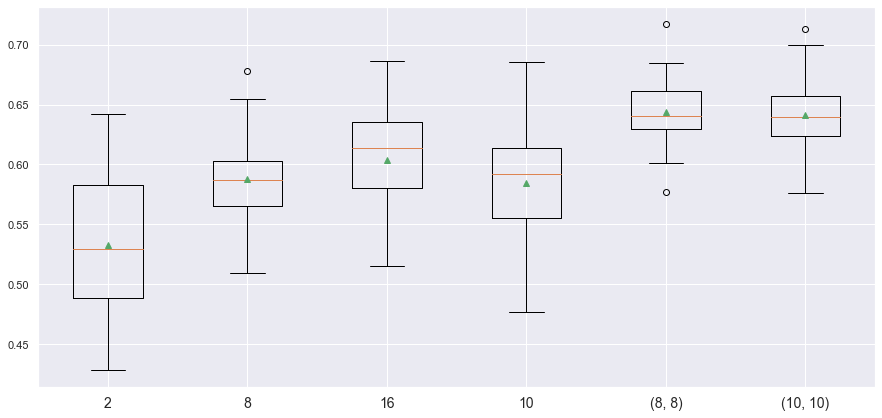

In [36]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = MLPClassifier(solver = 'adam', hidden_layer_sizes= value).fit(X_train, y_train)
    return models

models = get_models([(2),(8),(16),(10),(8,8),(10,10)])
return_results(models)

<div class="alert alert-block alert-success">
<a class="anchor" id="four-bullet">    

### 2. - scaling
 </a>
    
</div>

### testing which scaling to use


#### Concluding that there it doesn't matter that much, except do not use minma [0 , 1]


In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 

In [73]:

X_train, X_val, y_train, y_val = train_test_split(df_model6.drop('Buy', axis=1),df_model6['Buy'], test_size=0.2)

In [74]:
min_max1 = MinMaxScaler().fit(X_train)
min_max_X_train = min_max1.transform(X_train)
min_max1_X_val = min_max1.transform(X_val)
model_min_max1 = MLPClassifier().fit(X_train, y_train)


# create a MinMaxScaler instance that will range between -1 and 1 and 
min_max2 = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
# Transfor your train data by applying the scale obtained in the f
min_max2_X_train = min_max2.transform(X_train)
# Transfor your validation data by applying the scale obtained in the f
min_max2_X_val = min_max2.transform(X_val)
# Create a new classifier and fit to your scaled training data
model_min_max2 = MLPClassifier().fit(min_max2_X_train, y_train)


scaler = StandardScaler().fit(X_train)
scaler_X_train = scaler.transform(X_train)
scaler_X_val = scaler.transform(X_val)
model_scaler = MLPClassifier().fit(scaler_X_train, y_train)

# create a RobustScaler instance and fit to your data 
robust = RobustScaler().fit(X_train)
# Transfor your train data by applying the scale obtained in the previous 
robust_X_train = robust.transform(X_train)
# Transfor your validation data by applying the scale obtained in the f
robust_X_val = robust.transform(X_val)
# Create a new classifier and fit to your scaled training data
model_robust = MLPClassifier().fit(robust_X_train, y_train)
# check the mean accuuracy of your classifier in your calidation data
#model_min_max2.score(min_max2_X_val, y_val)

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

In [75]:
model = MLPClassifier().fit(X_train, y_train)

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.85, 0.91)]

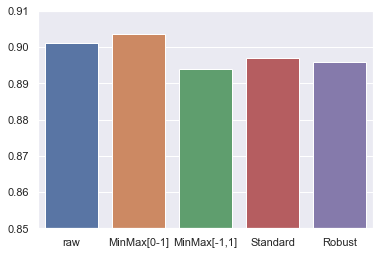

In [76]:
%matplotlib inline



x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y = [model.score(X_val, y_val), model_min_max1.score(min_max1_X_val, y_val), 
    model_min_max2.score(min_max2_X_val, y_val),model_scaler.score(scaler_X_val, y_val),
    model_robust.score(robust_X_val, y_val)]


ax = sns.barplot(x, y)
ax.set(ylim=(0.85, 0.91)) 

<div class="alert alert-block alert-success">
<a class="anchor" id="four-bullet">    

### 4. - iterations 
 </a>
    
</div>
max_iter = 350

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the opti

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the opti

>100 0.593 (0.038)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>200 0.632 (0.032)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the opti

>300 0.628 (0.034)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the opti

>350 0.632 (0.032)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (385) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (385) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (385) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (385) reached and the opti

>385 0.628 (0.034)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (390) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (390) reached and the opti

>390 0.630 (0.030)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

>500 0.620 (0.036)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


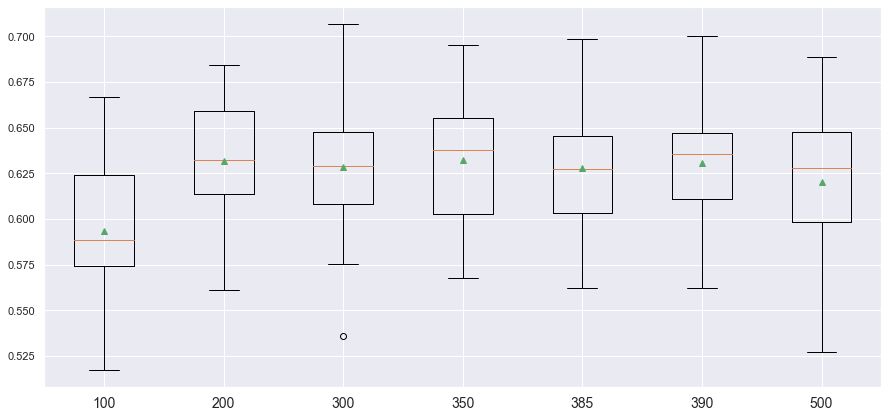

In [25]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = MLPClassifier(random_state = 10, max_iter = value).fit(X_train, y_train)
    return models

models = get_models([100, 200, 300, 350, 385, 390, 500])
return_results(models)

<div class="alert alert-block alert-success">
<a class="anchor" id="four-bullet">    

### 5. - solver with learning_rate and learn_rate_init 
 </a>
    
</div>
solver: Adam 
learning_rate = adaptive
learn_rate_init = 0.001

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/Data_Mining_Pr

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


>sgd 0.047 (0.024)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>adam 0.631 (0.033)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptr

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptr

>lbfgs 0.628 (0.034)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


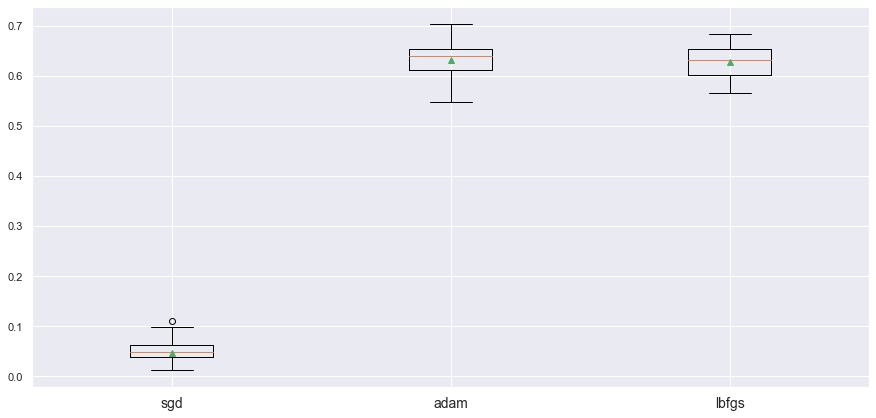

In [27]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = MLPClassifier(solver = value).fit(X_train, y_train)
    return models

models = get_models(['sgd','adam','lbfgs'])
return_results(models)

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


>invscaling 0.630 (0.035)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>constant 0.632 (0.038)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

>adaptive 0.629 (0.032)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


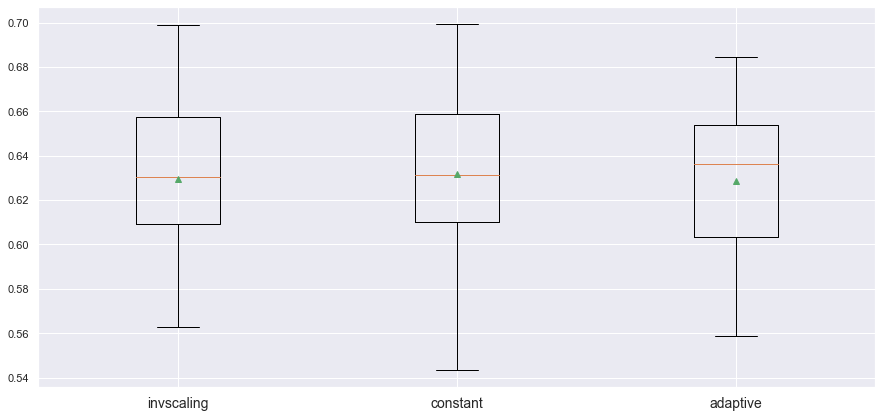

In [29]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = MLPClassifier(solver = 'adam', learning_rate = value).fit(X_train, y_train)
    return models

models = get_models(['invscaling','constant','adaptive'])
return_results(models)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the opti

>0.002 0.611 (0.039)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the opti

>0.0015 0.621 (0.031)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the opti

>0.001 0.629 (0.031)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the opti

>0.0005 0.637 (0.031)


/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  warnings.warn(


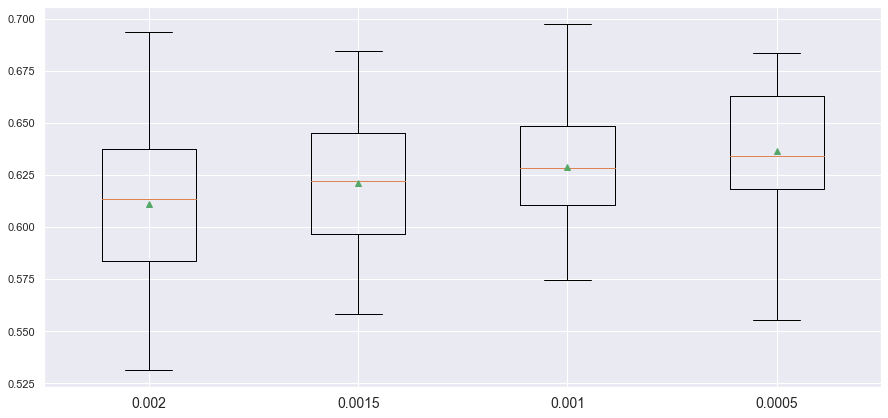

In [32]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = MLPClassifier(solver = 'adam', learning_rate_init = value, max_iter = 350).fit(X_train, y_train)
    return models

models = get_models([0.002, 0.0015, 0.001, 0.0005])
return_results(models)



## testing F1 score

In [84]:
test = pd.read_csv(r'test.csv')
test_ID = test.Access_ID
test.set_index('Access_ID', inplace = True)

test = test.drop(['Country', 'Browser'], axis=1)
features_test = list(test.columns)

test['Date'] = pd.to_datetime(test['Date'])
test['month'] = test['Date'].dt.month

test = test.drop(['Date'], axis=1)

categorical_features = ['OS','Type_of_Traffic','Type_of_Visitor','month']

ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(test[categorical_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=test.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?

test = pd.concat([test.drop(columns=categorical_features), ohc_df], axis=1)


features_test = list(test.columns)

scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(test)

test[features_test] = scaled_feat




/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

X = df_model6.drop('Buy', axis=1)
y = df_model6['Buy']

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X, y, scoring = 'f1', cv = cv)
    return n_scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X, y)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()